In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU

In [ ]:
Activo = "BTC-USD"
#Activo = 'AMZN'
hist = yf.download(Activo, start = '2015-01-01', end='2025-06-30')
hist = hist.dropna()

/tmp/ipython-input-3927095771.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hist = yf.download(Activo, start = '2015-01-01', end='2025-06-30')
[*********************100%***********************]  1 of 1 completed


In [ ]:
hist

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800
...,...,...,...,...,...
2025-06-25,107361.257812,108168.398438,105881.390625,106047.406250,51624120283
2025-06-26,106960.000000,108305.546875,106666.351562,107375.070312,43891990613


<Axes: xlabel='Date'>

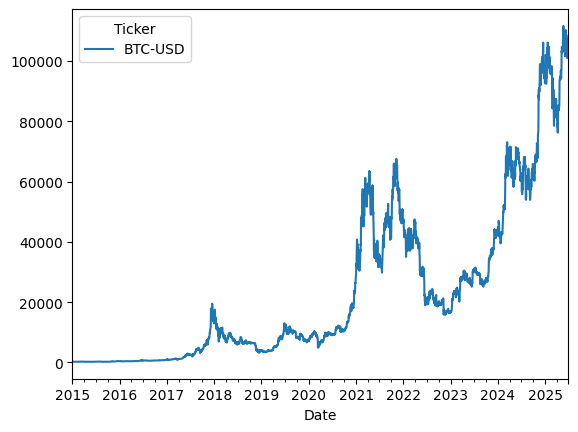

In [ ]:
hist['Close'].plot()

Modificacion de datos

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(hist['Close'].values.reshape(-1,1)) ## lo tranformamos en array en en una columna (-1,1)

In [ ]:
scaled_data

array([[1.22109313e-03],
       [1.22811603e-03],
       [9.23618452e-04],
       ...,
       [9.58878477e-01],
       [9.61024520e-01],
       [9.70512528e-01]])

In [ ]:
x_train = []
y_train = []

prediction_days = 60
for i in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[i-prediction_days:i, 0]) # vamos agarrando los 60 precios anteriores.
    y_train.append(scaled_data[i, 0])

In [ ]:
#convertimos la lista en columnas con ARRAY

x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train

array([[1.22109313e-03, 1.22811603e-03, 9.23618452e-04, ...,
        6.79177407e-04, 6.83078900e-04, 7.36345735e-04],
       [1.22811603e-03, 9.23618452e-04, 7.72159046e-04, ...,
        6.83078900e-04, 7.36345735e-04, 8.75078350e-04],
       [9.23618452e-04, 7.72159046e-04, 8.64351299e-04, ...,
        7.36345735e-04, 8.75078350e-04, 9.29179186e-04],
       ...,
       [8.50266787e-01, 8.44042653e-01, 8.43347766e-01, ...,
        9.49525634e-01, 9.61325472e-01, 9.57726591e-01],
       [8.44042653e-01, 8.43347766e-01, 8.63842136e-01, ...,
        9.61325472e-01, 9.57726591e-01, 9.58878477e-01],
       [8.43347766e-01, 8.63842136e-01, 8.67588795e-01, ...,
        9.57726591e-01, 9.58878477e-01, 9.61024520e-01]])

una red neuronal necesita como minimo 3 dimenciones

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape # Existe 3591 filas con 60 valores cada fila

(3773, 60, 1)

contruyendo el modelo

In [ ]:
model = Sequential()

model.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1))) #cuantas mas unidades mejor se adapta pero cuidado con el overfiting , return_sequences TRUE es para que se comunide para delante y atras.
model.add(Dropout(0.2)) ## capa de dropuot nos ayuda a evitar el sobreajuste.

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=50))
model.add(Dropout(0.1))

## la que predice el valor
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=25) # 25 epocas y tamaño de 32 ( si pongo de 10 son de 360 datos cada epoca , si pongo 25 son de 144datos )

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0161
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0010
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 9.6170e-04
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 9.0530e-04
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 7.8215e-04
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 9.0507e-04
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 7.2147e-04
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 7.7277e-04
Epoch 9/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 6.9799e-04
Epoch 10/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 6.6401e-04


analisis de prediccion

In [ ]:
hist_test = yf.download(Activo, start = '2025-01-01', end='2025-05-15')
precios_actuales = hist_test.dropna()
precios_actuales = precios_actuales['Close'].values
precios_actuales

/tmp/ipython-input-2683092478.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hist_test = yf.download(Activo, start = '2025-01-01', end='2025-05-15')
[*********************100%***********************]  1 of 1 completed


array([[ 94419.7578125],
       [ 96886.875    ],
       [ 98107.4296875],
       [ 98236.2265625],
       [ 98314.9609375],
       [102078.0859375],
       [ 96922.703125 ],
       [ 95043.5234375],
       [ 92484.0390625],
       [ 94701.453125 ],
       [ 94566.59375  ],
       [ 94488.4375   ],
       [ 94516.5234375],
       [ 96534.046875 ],
       [100504.4921875],
       [ 99756.90625  ],
       [104462.0390625],
       [104408.0703125],
       [101089.609375 ],
       [102016.6640625],
       [106146.265625 ],
       [103653.0703125],
       [103960.171875 ],
       [104819.484375 ],
       [104714.6484375],
       [102682.5      ],
       [102087.6875   ],
       [101332.4765625],
       [103703.2109375],
       [104735.3046875],
       [102405.0234375],
       [100655.90625  ],
       [ 97688.9765625],
       [101405.421875 ],
       [ 97871.8203125],
       [ 96615.4453125],
       [ 96593.296875 ],
       [ 96529.0859375],
       [ 96482.453125 ],
       [ 96500.09375  ],


In [ ]:
total_dataset = pd.concat((hist['Close'],hist_test['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset) - len(hist_test) - prediction_days:].values
model_inputs = scaler.transform(model_inputs.reshape(-1,1))


In [ ]:
x_test =[]

for i in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[i-prediction_days:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predictions)  # proceso inverso para volver a los precios a la normalidad.


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


Text(0, 0.5, 'Precio de BTC-USD')

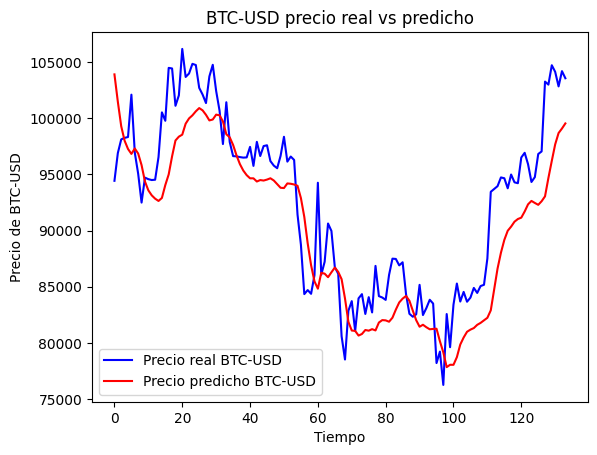

In [ ]:
#comparamos los precios reales con los predichos
plt.plot(precios_actuales, color='blue', label=f'Precio real {Activo}')
plt.plot(predicted_prices, color='red', label=f'Precio predicho {Activo}')
plt.title(f'{Activo} precio real vs predicho')
plt.xlabel('Tiempo')
plt.legend()
plt.ylabel(f'Precio de {Activo}')

rentabilidad si seguiamos lo que decia la prediccion

In [ ]:
rentabilidad = 1
for i in range(1,len(precios_actuales)):
  if precios_actuales[i] > precios_actuales[i-1]:
    rentabilidad = rentabilidad * (precios_actuales[i]/precios_actuales[i-1])

print((rentabilidad-1)*100,'%')

[270.67737592] %
